# Librerías

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import random
import os
from google.colab import drive
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import pickle as pkl
from bs4 import BeautifulSoup
import spacy
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import Concatenate
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot



#!python -m spacy download en_core_web_md

# Creación del dataset

Sección en donde organicé las imágenes dentro de carpetas. Hice esto desde el código, pues eran más de 50,000 imágenes.
No contiene código relevante

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#zip_file_path = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Test.zip'

In [ ]:
#extract_to = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/'

In [ ]:
#os.makedirs(extract_to, exist_ok=True)

In [ ]:
#!ls /content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/


In [ ]:
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_to)

In [ ]:
''' def gather_images(src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for fruit_dir in os.listdir(src_dir):
        fruit_path = os.path.join(src_dir, fruit_dir)
        if os.path.isdir(fruit_path):
            for img_file in os.listdir(fruit_path):
                src_img = os.path.join(fruit_path, img_file)
                dest_img = os.path.join(dest_dir, fruit_dir + '_' + img_file)
                shutil.copyfile(src_img, dest_img)

train_dir = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Training'
test_dir = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Test'
combined_dir = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Data'

gather_images(train_dir, combined_dir)
gather_images(test_dir, combined_dir) '''

" def gather_images(src_dir, dest_dir):\n    if not os.path.exists(dest_dir):\n        os.makedirs(dest_dir)\n    for fruit_dir in os.listdir(src_dir):\n        fruit_path = os.path.join(src_dir, fruit_dir)\n        if os.path.isdir(fruit_path):\n            for img_file in os.listdir(fruit_path):\n                src_img = os.path.join(fruit_path, img_file)\n                dest_img = os.path.join(dest_dir, fruit_dir + '_' + img_file)\n                shutil.copyfile(src_img, dest_img)\n\ntrain_dir = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Training'\ntest_dir = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Test'\ncombined_dir = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Data'\n\ngather_images(train_dir, combined_dir)\ngather_images(test_dir, combined_dir) "

# Preprocesamiento

## Preprocesamiento de imágenes

Sección en donde principalmente hice un resize de las imágenes y una normalización entre 0 y 1

In [ ]:
''' image_folder_path = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Data'

target_size = (64, 64)

images = []
image_names = []
 '''

" image_folder_path = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Data'\n\ntarget_size = (64, 64)\n\nimages = []\nimage_names = []\n "

In [ ]:
''' # Cargar y preprocesar las imágenes
for filename in os.listdir(image_folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Verifica que el archivo sea una imagen
        image_path = os.path.join(image_folder_path, filename)  # Obtiene la ruta completa de la imagen
        img = Image.open(image_path).resize(target_size)  # Carga y redimensiona la imagen
        img = np.array(img) / 255.0  # Convierte la imagen a un array de NumPy y normaliza los píxeles a [0, 1]
        images.append(img)  # Agrega la imagen a la lista
        image_names.append(filename)  # Agrega el nombre de la imagen a la lista

# Convertir las listas a arrays de NumPy
images = np.array(images)
 '''

' # Cargar y preprocesar las imágenes\nfor filename in os.listdir(image_folder_path):\n    if filename.endswith(".jpg") or filename.endswith(".png"):  # Verifica que el archivo sea una imagen\n        image_path = os.path.join(image_folder_path, filename)  # Obtiene la ruta completa de la imagen\n        img = Image.open(image_path).resize(target_size)  # Carga y redimensiona la imagen\n        img = np.array(img) / 255.0  # Convierte la imagen a un array de NumPy y normaliza los píxeles a [0, 1]\n        images.append(img)  # Agrega la imagen a la lista\n        image_names.append(filename)  # Agrega el nombre de la imagen a la lista\n\n# Convertir las listas a arrays de NumPy\nimages = np.array(images)\n '

In [ ]:
''' len(image_names
    ) '''

' len(image_names\n    ) '

In [ ]:
''' len(images) '''

' len(images) '

In [ ]:
''' num_files = len(os.listdir('/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Test'))
print(f"Hay {num_files} archivos en la carpeta.") '''

' num_files = len(os.listdir(\'/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Test\'))\nprint(f"Hay {num_files} archivos en la carpeta.") '

In [ ]:
'''

def load_images(root_dir, target_size=(64, 64)):
    count = 0
    # Inicializar listas para almacenar imágenes y etiquetas
    images = []
    labels = []

    # Recorrer todas las subcarpetas dentro del directorio raíz
    for folder_name in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder_name)
        if os.path.isdir(folder_path):
            # Leer todas las imágenes dentro de la subcarpeta
            for filename in os.listdir(folder_path):
                count+=1
                if(count % 1000 == 0):
                  print(count)
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    image_path = os.path.join(folder_path, filename)
                    img = Image.open(image_path).resize(target_size)
                    img_array = np.array(img) / 255.0

                    # Agregar la imagen original a las listas
                    images.append(img_array)
                    labels.append(folder_name)

    # Convertir las listas a arrays de NumPy
    images = np.array(images)
    labels = np.array(labels)

    # Crear el DataFrame
    df = pd.DataFrame({'image': list(images), 'label': labels})
    return df




# Ruta a las carpetas Test y Training en Google Drive
test_dir = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Training'
train_dir = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/Test'

 '''

' \n\ndef load_images(root_dir, target_size=(64, 64)):\n    count = 0\n    # Inicializar listas para almacenar imágenes y etiquetas\n    images = []\n    labels = []\n\n    # Recorrer todas las subcarpetas dentro del directorio raíz\n    for folder_name in os.listdir(root_dir):\n        folder_path = os.path.join(root_dir, folder_name)\n        if os.path.isdir(folder_path):\n            # Leer todas las imágenes dentro de la subcarpeta\n            for filename in os.listdir(folder_path):\n                count+=1\n                if(count % 1000 == 0):\n                  print(count)\n                if filename.endswith(".jpg") or filename.endswith(".png"):\n                    image_path = os.path.join(folder_path, filename)\n                    img = Image.open(image_path).resize(target_size)\n                    img_array = np.array(img) / 255.0\n\n                    # Agregar la imagen original a las listas\n                    images.append(img_array)\n                    labe

In [ ]:

# Cargar las imágenes de Training
#train_df = load_images(train_dir)


In [ ]:
#train_df.to_pickle('/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/train_df.pkl')

In [ ]:

# Cargar las imágenes de Test
#test_df = load_images(test_dir)

# Combinar los DataFrames de Training y Test
#combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Mostrar algunas filas del DataFrame combinado
#print(combined_df.head())

In [ ]:
#test_df.to_pickle('/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/train_df.pkl')

## Lectura de Datos

In [ ]:
ruta_train = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/train_df.pkl'

with open(ruta_train, 'rb') as archivo:
    df_train = pkl.load(archivo)

df_train

,image,label
0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Apple Braeburn
1,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Apple Braeburn
2,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Apple Braeburn
3,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Apple Braeburn
4,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Apple Braeburn
...,...,...
22683,"[[[0.996078431372549, 1.0, 1.0], [0.9960784313...",Watermelon
22684,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Watermelon
22685,"[[[0.996078431372549, 1.0, 1.0], [1.0, 1.0, 1....",Watermelon
22686,"[[[0.996078431372549, 1.0, 0.9921568627450981]...",Watermelon


In [ ]:
ruta_test = '/content/drive/MyDrive/Diplomado/Módulo_4/Proyecto_final/test_df.pkl'

with open(ruta_test, 'rb') as archivo:
    df_test = pkl.load(archivo)

df_test

,image,label
0,"[[[0.996078431372549, 1.0, 1.0], [0.9960784313...",Apple Braeburn
1,"[[[0.996078431372549, 1.0, 1.0], [0.9960784313...",Apple Braeburn
2,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Apple Braeburn
3,"[[[0.9921568627450981, 1.0, 0.984313725490196]...",Apple Braeburn
4,"[[[0.9921568627450981, 1.0, 0.984313725490196]...",Apple Braeburn
...,...,...
37181,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Nut Pecan
37182,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Nut Pecan
37183,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Nut Pecan
37184,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",Nut Pecan


In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)

Solo tomé los registros que tuvieran las siguientes etiquetas

In [ ]:
df = df[df['label'].isin(['Corn Husk', 'Apple Braeburn', 'Lemon'])]

In [ ]:
df['label'].nunique()

3

In [ ]:
df.shape

(1928, 2)

In [ ]:
label_map = {
    'Corn Husk': 0,
    'Apple Braeburn': 1,
    'Lemon': 2,
    'Pear Monster' : 3
}

# Aplicar el mapeo al DataFrame
df['label_num'] = df['label'].map(label_map)

In [ ]:
df['label_num']

0        1
1        1
2        1
3        1
4        1
        ..
53342    2
53343    2
53344    2
53345    2
53346    2
Name: label_num, Length: 1928, dtype: int64

## Word Embeddings

**Importante**
A pesar de que hubiera deseado que el modelo funcionara con Word Embeddings, no pude lograrlo. Terminé usando un label distinto en donde las categorías eran representadas por un número y a partir de este número se obtenía el vector que caracterizaría cada categoría

In [ ]:
''' nlp = spacy.load('en_core_web_md') '''

" nlp = spacy.load('en_core_web_md') "

In [ ]:
''' ## Funciones para verificar que todos los valores de la columna 'label' tenga un vector
## en caso de no tener un vector, éste se les crea
def get_embedding(word):
    if word in nlp.vocab:
        return nlp(word).vector
    else:
        return np.random.normal(size=(nlp.vocab.vectors_length,))

def ensure_embeddings(labels):
    embeddings = {}
    for label in labels:
        tokens = label.split()
        vectors = [get_embedding(token) for token in tokens]
        embedding = np.mean(vectors, axis=0)
        embeddings[label] = embedding
    return embeddings

unique_labels = df['label'].unique()

label_embeddings = ensure_embeddings(unique_labels)

df['label_embedding'] = df['label'].map(label_embeddings)
 '''

" ## Funciones para verificar que todos los valores de la columna 'label' tenga un vector\n## en caso de no tener un vector, éste se les crea\ndef get_embedding(word):\n    if word in nlp.vocab:\n        return nlp(word).vector\n    else:\n        return np.random.normal(size=(nlp.vocab.vectors_length,))\n\ndef ensure_embeddings(labels):\n    embeddings = {}\n    for label in labels:\n        tokens = label.split()\n        vectors = [get_embedding(token) for token in tokens]\n        embedding = np.mean(vectors, axis=0)\n        embeddings[label] = embedding\n    return embeddings\n\nunique_labels = df['label'].unique()\n\nlabel_embeddings = ensure_embeddings(unique_labels)\n\ndf['label_embedding'] = df['label'].map(label_embeddings)\n "

In [ ]:
''' df.head() '''

' df.head() '

# Modelo

In [ ]:
df.shape

(1928, 3)

In [ ]:
# Se escala entre -1 y 1 para funcionar con la función tanh
df['image'] = (df['image']*2)-1

In [ ]:
images = np.stack(df['image'].values)
embeddings = np.stack(df['label_num'].values)

In [ ]:
X_train = images
y_train = embeddings

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(images, embeddings, test_size=0.2, random_state=42)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1928, 64, 64, 3)
y_train shape: (1928,)


In [ ]:
''' print(f"X_train shape: {X_val.shape}")
print(f"y_train shape: {y_val.shape}") '''

' print(f"X_train shape: {X_val.shape}")\nprint(f"y_train shape: {y_val.shape}") '

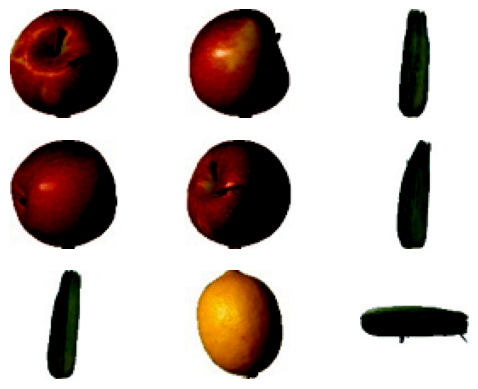

In [ ]:
# Ejemplos de imágenes
for i in range(df['label'].nunique()*df['label'].nunique()):
    pyplot.subplot(df['label'].nunique(), df['label'].nunique(), 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X_train[random.randint(0, X_train.shape[0]-1)])
pyplot.show()

In [ ]:
def define_discriminator(in_shape=(64,64,3), n_classes=df['label'].nunique()):

  # Procesamiento de los labels
  in_label = Input(shape=(1,))
  li = Embedding(n_classes, 50)(in_label)

  # Procesamiento de dimensiones
  n_nodes = in_shape[0] * in_shape[1]
  li = Dense(n_nodes)(li)
  li = Reshape((in_shape[0], in_shape[1], 1))(li)

  # Input de imagen
  in_image = Input(shape=in_shape)

  # Concatenación de imágenes y labels
  merge = Concatenate()([in_image, li])

  # Arquitectura del modelo
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Flatten()(fe)
  fe = Dropout(0.4)(fe)
  out_layer = Dense(1, activation='sigmoid')(fe)

  # Modelo (Función de activación sigmoide para ver probabilidad de que la imagen sea falsa o verdadera)
  model = Model([in_image, in_label], out_layer)
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
def define_generator(latent_dim, n_classes=df['label'].nunique()):
 # Procesamiento de los labels
 in_label = Input(shape=(1,))
 li = Embedding(n_classes, 50)(in_label)

 # Procesamiento de dimensiones
 n_nodes = 16 * 16
 li = Dense(n_nodes)(li)
 li = Reshape((16, 16, 1))(li)

 # Input y creación de imagen base
 in_lat = Input(shape=(latent_dim,))
 n_nodes = 128 * 16 * 16
 gen = Dense(n_nodes)(in_lat)
 gen = LeakyReLU(alpha=0.2)(gen)
 gen = Reshape((16, 16, 128))(gen)

 # Concatenación con la etiqueta
 merge = Concatenate()([gen, li])

 # Arquitectura del modelo (Aumento de dimensiones)
 gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
 gen = LeakyReLU(alpha=0.2)(gen)
 gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
 gen = LeakyReLU(alpha=0.2)(gen)
 out_layer = Conv2D(3, (16,16), activation='tanh', padding='same')(gen)

 # Modelo
 model = Model([in_lat, in_label], out_layer)
 return model

In [ ]:
def define_gan(g_model, d_model):
 # Hacer que los pesos del dicriminador no sean entrenables (Necesario para que funcione el modelo)
 d_model.trainable = False

 # Ejecución del generador y preparación de datos
 gen_noise, gen_label = g_model.input
 gen_output = g_model.output

 # Ejecución del discriminador
 gan_output = d_model([gen_output, gen_label])

 # Modelo GAN
 model = Model([gen_noise, gen_label], gan_output)
 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt)
 return model

In [ ]:
# Función que regresa el dataset de imágenes con sus respectivos labels
def load_real_samples():
 X = X_train
 X = X.astype('float32')
 return [X, y_train]

In [ ]:
# Función para generar un lote de imágenes reales
def generate_real_samples(dataset, n_samples):
 images, labels = dataset
 ix = randint(0, images.shape[0], n_samples)
 X, labels = images[ix], labels[ix]

 # Etiquetas que indican que las imágenes son reales
 y = ones((n_samples, 1))
 return [X, labels], y

In [ ]:
# Función que genera ruido y etiquetas
def generate_latent_points(latent_dim, n_samples, n_classes=df['label'].nunique()):
 # Generación de ruido
 x_input = randn(latent_dim * n_samples)
 z_input = x_input.reshape(n_samples, latent_dim)

 # Generación de etiquetas
 labels = randint(0, n_classes, n_samples)
 return [z_input, labels]

In [ ]:
# Función que genera imágenes falsas
def generate_fake_samples(generator, latent_dim, n_samples):
 # Se definen los inputs
 z_input, labels_input = generate_latent_points(latent_dim, n_samples)

 # Se crean las imágenes
 images = generator.predict([z_input, labels_input])

 # Se marcan como imágenes falsas
 y = zeros((n_samples, 1))
 return [images, labels_input], y

In [ ]:

# Función de entrenamiento del modelo cGAN
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=60, n_batch=30):
 # Tamaño del lote de datos que se tomaran para entrenar
 bat_per_epo = int(dataset[0].shape[0] / n_batch)

 # Se divide entre 2, reales y falsos
 half_batch = int(n_batch / 2)

 # Loop de épocas
 for i in range(n_epochs):

  # Loop de lotes
  for j in range(bat_per_epo):

    # Entrenamiento del discriminador con muestras reales
    [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
    d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)

    # Entrenamiento del discriminador con muestras falsas
    [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)

    # Entrenamiento del GAN, en donde se mandan imágenes falsas con etiqueta verdadera
    [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
    y_gan = ones((n_batch, 1))
    g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)

    # Función de pérdida
    print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
    (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))

 # Se guarda el modelo
 g_model.save('cgan_generator.h5')

In [ ]:

# Tamaño del vector de ruido
latent_dim = 100

# Definición de modelos
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)

# Carga de los datos
dataset = load_real_samples()

# Entrenamiento
train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 18ms/step
>21, 61/64, d1=0.131, d2=0.072 g=6.800
1/1 [==============================] - 0s 19ms/step
>21, 62/64, d1=0.032, d2=0.015 g=4.853
1/1 [==============================] - 0s 19ms/step
>21, 63/64, d1=0.043, d2=0.061 g=6.229
1/1 [==============================] - 0s 19ms/step
>21, 64/64, d1=0.044, d2=0.002 g=12.020
1/1 [==============================] - 0s 19ms/step
>22, 1/64, d1=0.021, d2=0.000 g=35.247
1/1 [==============================] - 0s 19ms/step
>22, 2/64, d1=0.006, d2=0.000 g=19.694
1/1 [==============================] - 0s 20ms/step
>22, 3/64, d1=0.004, d2=0.000 g=27.249
1/1 [==============================] - 0s 19ms/step
>22, 4/64, d1=0.019, d2=0.000 g=15.793
1/1 [==============================] - 0s 19ms/step
>22, 5/64, d1=0.004, d2=0.000 g=12.453
1/1 [==============================] - 0s 20ms/step
>22, 6/64, d1=0.002, d2=0.000 g=10.494
1/1 [==============================] -

>60, 64/64, d1=0.006, d2=0.297 g=4.755


1/1 [==============================] - 0s 151ms/step


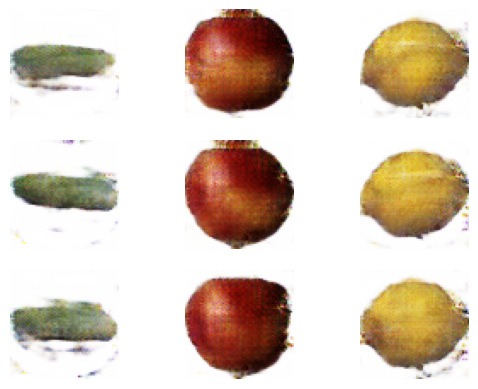

In [ ]:
# Impresión de imágenes
def save_plot(examples, n):
 for i in range(n * n):
  pyplot.subplot(n, n, 1 + i)
  pyplot.axis('off')
  pyplot.imshow(examples[i, :, :, :])
 pyplot.show()

# Se carga el modelo
model = load_model('cgan_generator.h5')

# Generación de parámetros
dims = df['label'].nunique() * df['label'].nunique()
latent_points, labels = generate_latent_points(100, dims)

# Generación de etiquetas
labels = np.tile(np.arange(df['label'].nunique()), int(dims / df['label'].nunique()))

# Generación de imágenes
X  = model.predict([latent_points, labels])

# Se escala entre 0 y 1
X = (X + 1) / 2.0

# Plot
save_plot(X, df['label'].nunique())

1/1 [==============================] - 0s 20ms/step


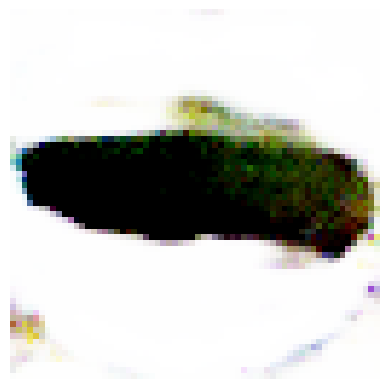

In [ ]:
latent_points, labels = generate_latent_points(100, 1)
labels = np.asarray([0])
X  = model.predict([latent_points, labels])
pyplot.axis('off')
# plot raw pixel data
pyplot.imshow(X[0])
pyplot.show()